In [1]:
'''
Nama    : Rabby Fitriana Adawiyah
NIM     : 1101202505
Kelas   : TT - 44 - 04
'''

'\nNama    : Aldra Kasyfil Aziz\nNIM     : 1101201509\nKelas   : TT - 44 - 04\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''Dengan menggunakan algoritma KNN, Logistic regresion, Decession Tree dan Gauisian Naive Bayes.
Lakukan prediksi klasifikasi dataset tersebut kemudian hitung akurasi setiap algoritma!'''

'Dengan menggunakan algoritma KNN, Logistic regresion, Decession Tree dan Gauisian Naive Bayes. \nLakukan prediksi klasifikasi dataset tersebut kemudian hitung akurasi setiap algoritma!'

# Membaca Data CSV

In [3]:
data = pd.read_csv('diabetes.csv', sep = ',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
'''Melihat Ukuran Data CSV'''
data.shape

(768, 9)

In [6]:
'''Menghitung data Outcome'''
# 0 = Sehat, 1 = Sakit
pd.value_counts(data.Outcome)

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
'''Mendeskripsi Statistika dari data CSV'''
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
'''Melihat Tipe Data Column'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Reprocessing

In [9]:
'''Mengecek Data yang null/kosong'''
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Plot Histogram

Menampilkan data dengan plot histogram

<Axes: >

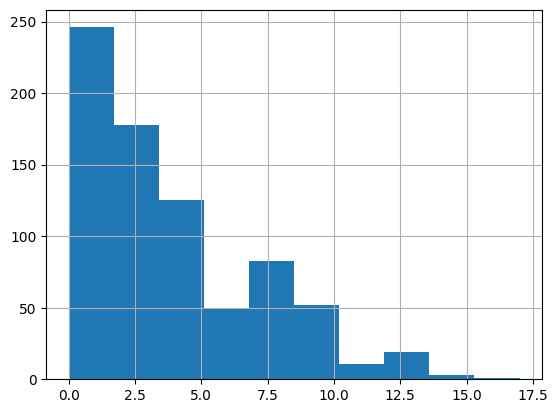

In [10]:
'''Plot Histogram Data Pregnancies'''
data['Pregnancies'].hist()

<Axes: >

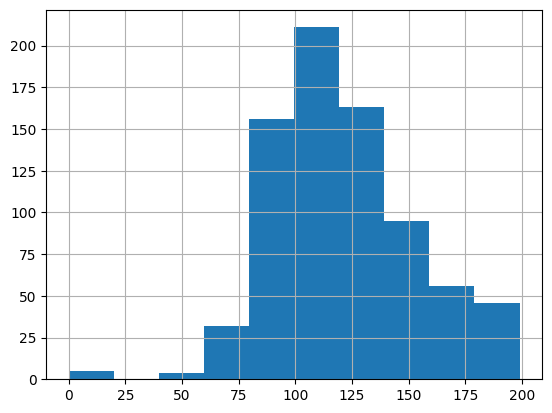

In [11]:
'''Plot Histogram Data Glucose'''
data['Glucose'].hist()

<Axes: >

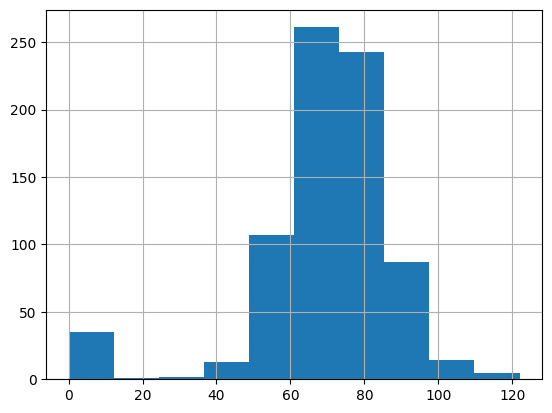

In [12]:
'''Plot Histogram Data Blood Pressure'''
data['BloodPressure'].hist()

<Axes: >

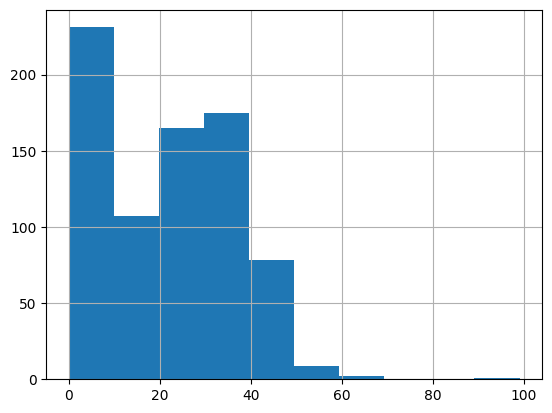

In [13]:
'''Plot Histogram Data Skin Thickness'''
data['SkinThickness'].hist()

<Axes: >

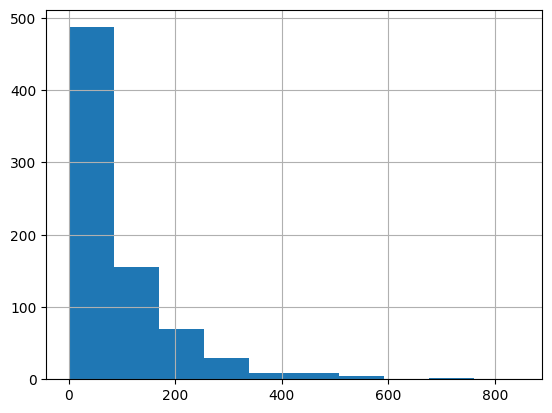

In [14]:
'''Plot Histogram Data Insulin'''
data['Insulin'].hist()

<Axes: >

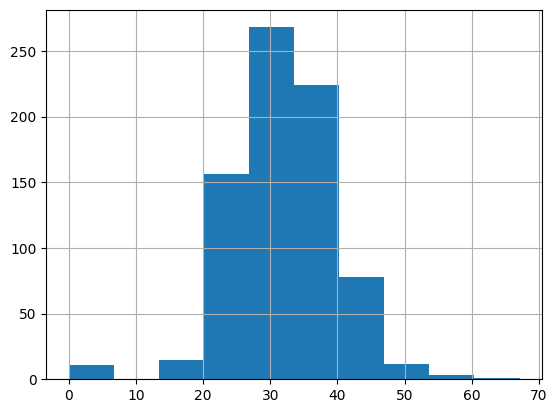

In [15]:
'''Plot Histogram Data BMI'''
data['BMI'].hist()

<Axes: >

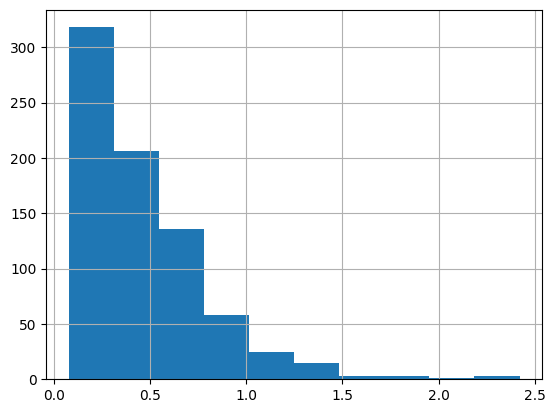

In [16]:
'''Plot Histogram Data Diabetes Pedigree Function'''
data['DiabetesPedigreeFunction'].hist()

<Axes: >

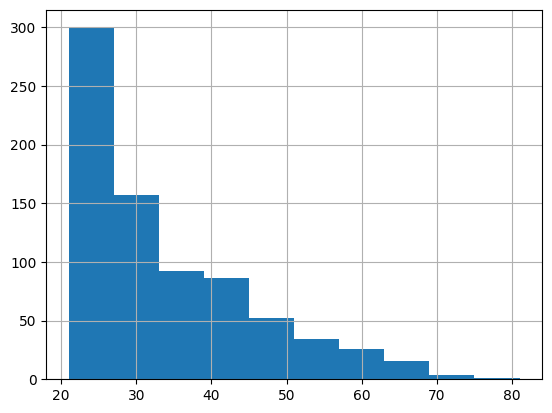

In [17]:
'''Plot Histogram Data Age'''
data['Age'].hist()

<Axes: >

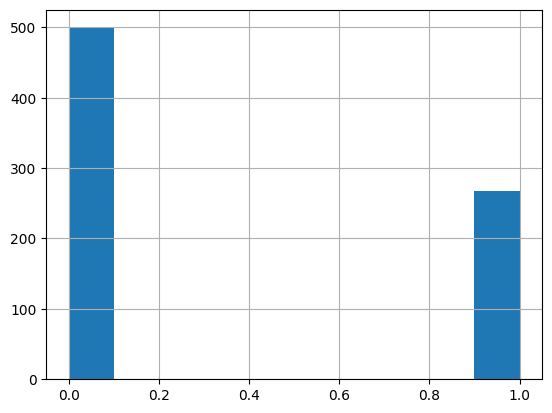

In [18]:
'''Plot Histogram Data Outcome'''
data['Outcome'].hist()

# Plot Seaborn

Plotting data memakai scatter plot menggunakan Library Seaborn

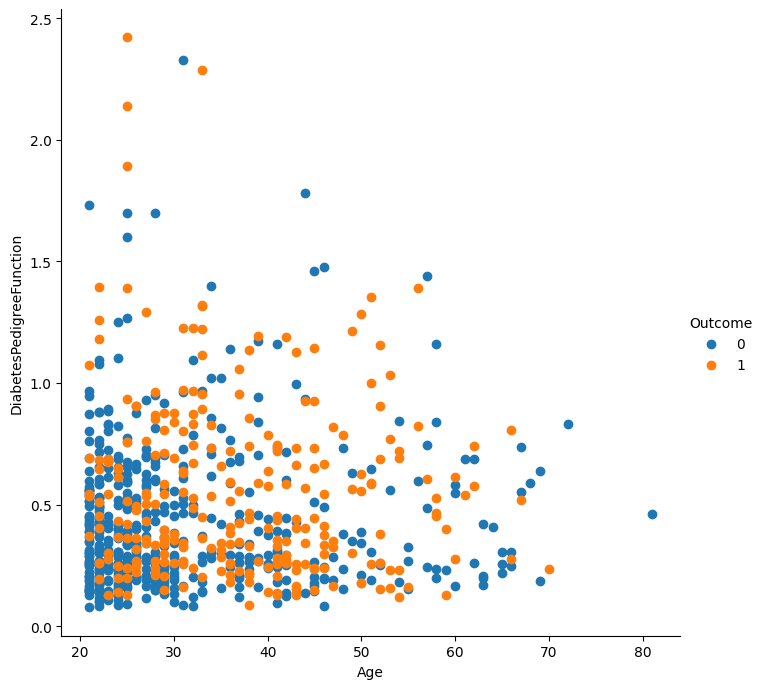

In [19]:
sns.FacetGrid(data, hue='Outcome', height=7).map(plt.scatter,"Age","DiabetesPedigreeFunction").add_legend()

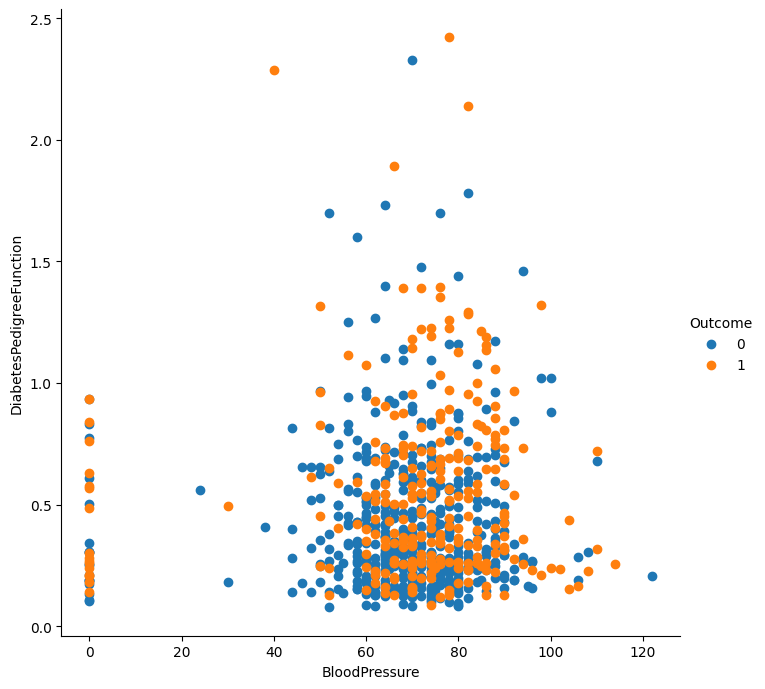

In [20]:
sns.FacetGrid(data, hue='Outcome', height=7).map(plt.scatter,"BloodPressure","DiabetesPedigreeFunction").add_legend()

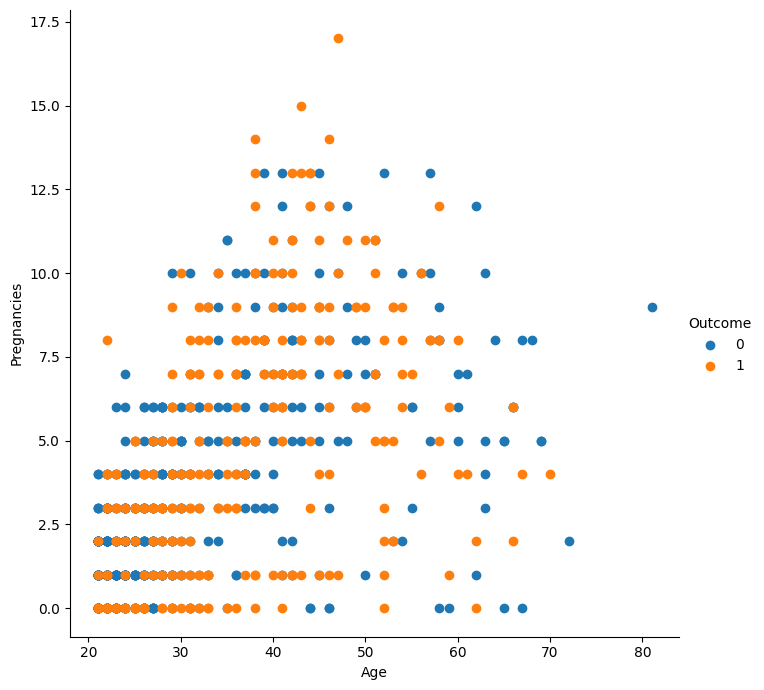

In [21]:
sns.FacetGrid(data, hue='Outcome', height=7).map(plt.scatter,"Age","Pregnancies").add_legend()

# Penggunaan Scikit-Learn

Melakukan prediksi klasifikasi dataset dengan menggunakan algoritma KNN, Logistic regresion, Decession Tree dan Gauisian Naive Bayes kemudian hitung akurasi setiap algoritma!

In [22]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Outcome'])
Y=data['Outcome']
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print('Akurasi Logistic Regresion : ',model.score(x_test,y_test)*100)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print('Akurasi KNN : ',model.score(x_test,y_test)*100)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print('Akurasi Decession Tree : ',model.score(x_test,y_test)*100)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
print('Akurasi Gauisian Naive Bayes : ',model.score(x_test,y_test)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Logistic Regresion :  75.32467532467533
Akurasi KNN :  72.2943722943723
Akurasi Decession Tree :  67.09956709956711
Akurasi Gauisian Naive Bayes :  75.32467532467533
